<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;数据科学引论 - Python之道 </h1>

<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第9课 机器学习</h1>
# <center>决策树</center>

这一章你将会学习一个流行的机器学习算法-决策树

导入指定库:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [1]:
import numpy as np 
import pandas 
from sklearn.tree import DecisionTreeClassifier

现在我们简单介绍一下数据集，我们是使用一个叫skulls.csv的数据集，包括来自5个时代的埃及头骨的测量数据.

<img src = "https://ibm.box.com/shared/static/02z8krlr99hwrqa2ecx3ycuiwqkcuzjv.png", align = 'left'>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<b>epoch</b> - 头骨的时代，分为公元前4000bc c3300BC，c1850BC，c200BC和cAD150等不同的等级。这些年份这是大约估算的。

<b>mb</b> - 头骨最大宽度.

<b>bh</b> - 头顶到颅底的高度.

<b>bl</b> - 下颚到颅底的长度.

<b>nh</b> - 鼻骨的高度.

---

In [2]:
my_data = pandas.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/HSAUR/skulls.csv", delimiter=",")

In [3]:
my_data[0:5]

,Unnamed: 0,epoch,mb,bh,bl,nh
0,1,c4000BC,131,138,89,49
1,2,c4000BC,125,131,92,48
2,3,c4000BC,131,132,99,50
3,4,c4000BC,119,132,96,44
4,5,c4000BC,136,143,100,54


用<b>my_data</b>读取来自skulls.csv的数据。声明以下变量
<ul>
    <li> <b> X </b> 作为 <b> 特征矩阵 </b> (就是my_data的数据) </li>

    
    <li> <b> Y </b> 作为 <b> 响应向量 (目标) </b> </li>

    
    <li> <b> targetNames </b>作为 <b> 响应向量名称列表(目标名称)</b> </li>
    
    
    <li> <b> featureNames </b> 作为 <b> 特征矩阵列名称列表 </b> </li>
   
</ul>

获得数据集的属性名列表

numpy.ndarray

In [9]:
featureNames = list(my_data.columns.values)[2:6]

In [17]:
# Remove the column containing the target name since it doesn't contain numeric values.
# axis=1 means we are removing columns instead of rows.
X = my_data.drop(my_data.columns[[0,1]], axis=1)
X[0:5]

,mb,bh,bl,nh
0,131,138,89,49
1,125,131,92,48
2,131,132,99,50
3,119,132,96,44
4,136,143,100,54


In [18]:
targetNames = my_data["epoch"].unique().tolist()
targetNames

['c4000BC', 'c3300BC', 'c1850BC', 'c200BC', 'cAD150']

In [19]:
y = my_data["epoch"]
y[0:5]

0    c4000BC
1    c4000BC
2    c4000BC
3    c4000BC
4    c4000BC
Name: epoch, dtype: object

---
## 设置决策树
我们将从原始数据中分离出训练和测试数据。为此，我们需要借助sklearn.cross_validation的train_test_split方法

In [20]:
from sklearn.cross_validation import train_test_split

现在<b> train_test_split </b> 会返回四个参数，我们将它们命名为:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
<b> train_test_split </b>会需要如下参数: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
在分离之前<b>X</b> and <b>y</b>是必需的，<b>test_size</b>表示测试数据的占比，<b>random_state</b>保证我们每次调用得到相同的分离结果。

In [21]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

输出X_trainset和 y_trainset的结构，确保维度相匹配。

In [22]:
#python2 print X_trainset.shape 
#python2 print y_trainset.shape
print (X_trainset.shape) 
print (y_trainset.shape)

(105, 4)
(105,)


输出X_testset 和 y_testset的结构，确保维度相匹配。

In [23]:
#python2 print X_testset.shape 
#python2 print y_testset.shape
print (X_testset.shape) 
print (y_testset.shape)

(45, 4)
(45,)


我们将先创建DecisionTreeClassifier（决策树分类器）的实例，赋值给skullsTree。

我们设置<i> criterion="entropy" </i>，这样能够得到每个节点的信息。

In [24]:
skullsTree = DecisionTreeClassifier(criterion="entropy")

现在我们用训练数据集X_trainset,y_trainset进行训练。

In [25]:
skullsTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

训练完成的模型针对测试数据集X_testset进行预测

In [26]:
predTree = skullsTree.predict(X_testset)

如果想要对预测值和实际值做比较，那么可以打印出 <b>predTree</b> 和 <b>y_testset</b>

In [29]:
print(predTree [0:5])
print(y_testset [0:5])

['c3300BC' 'c4000BC' 'c1850BC' 'c200BC' 'c3300BC']
47    c3300BC
3     c4000BC
31    c3300BC
25    c4000BC
15    c4000BC
Name: epoch, dtype: object


接下来，从sklearn中导入metrics，检查我们的模型的准确性 

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: "), metrics.accuracy_score(y_testset, predTree)

DecisionTrees's Accuracy: 


(None, 0.33333333333333331)

In [31]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

# for graphviz on windows
#import os     
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


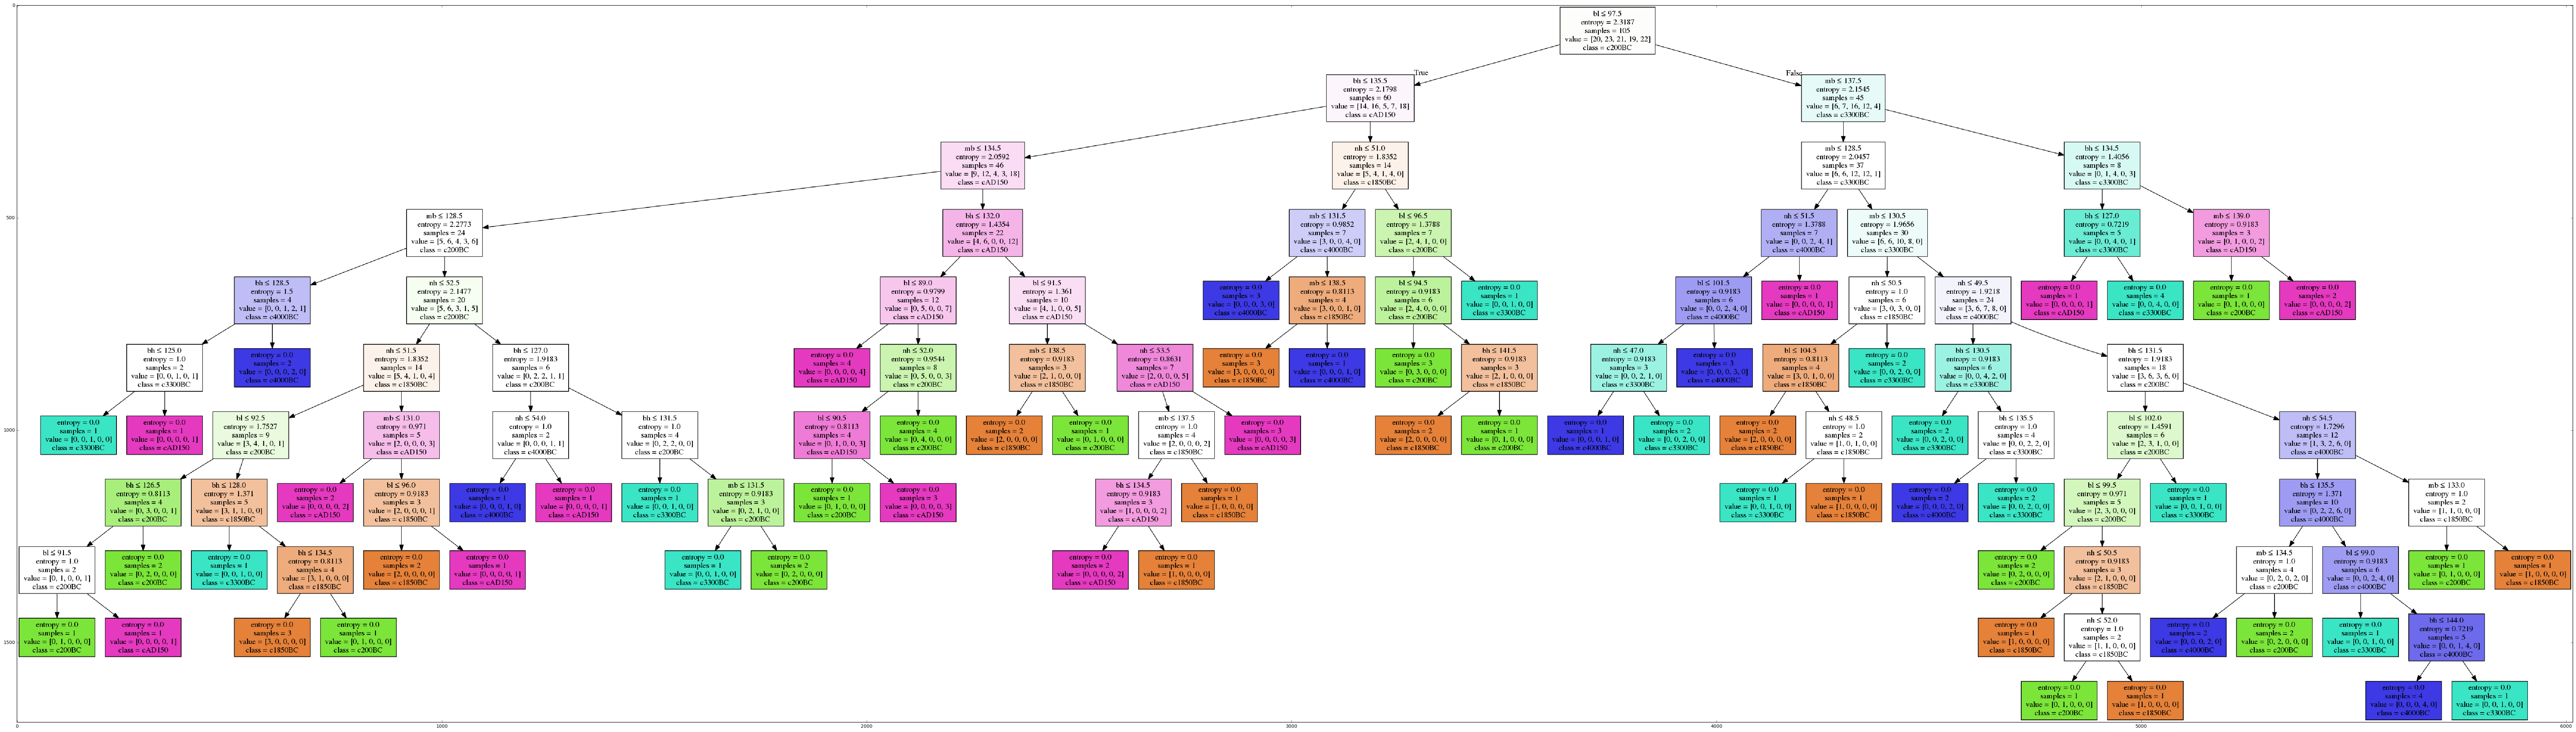

In [33]:
dot_data = StringIO()
filename = "skulltree.png"
out=tree.export_graphviz(skullsTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')